In [11]:
from world_machine_experiments import toy1d, shared
from world_machine_experiments.toy1d import Dimensions
from world_machine_experiments.toy1d import base, multiple, parameter_variation
from world_machine import WorldMachine

from hamilton import driver
from hamilton_sdk import adapters
from torch.optim import Adam, AdamW
import torch

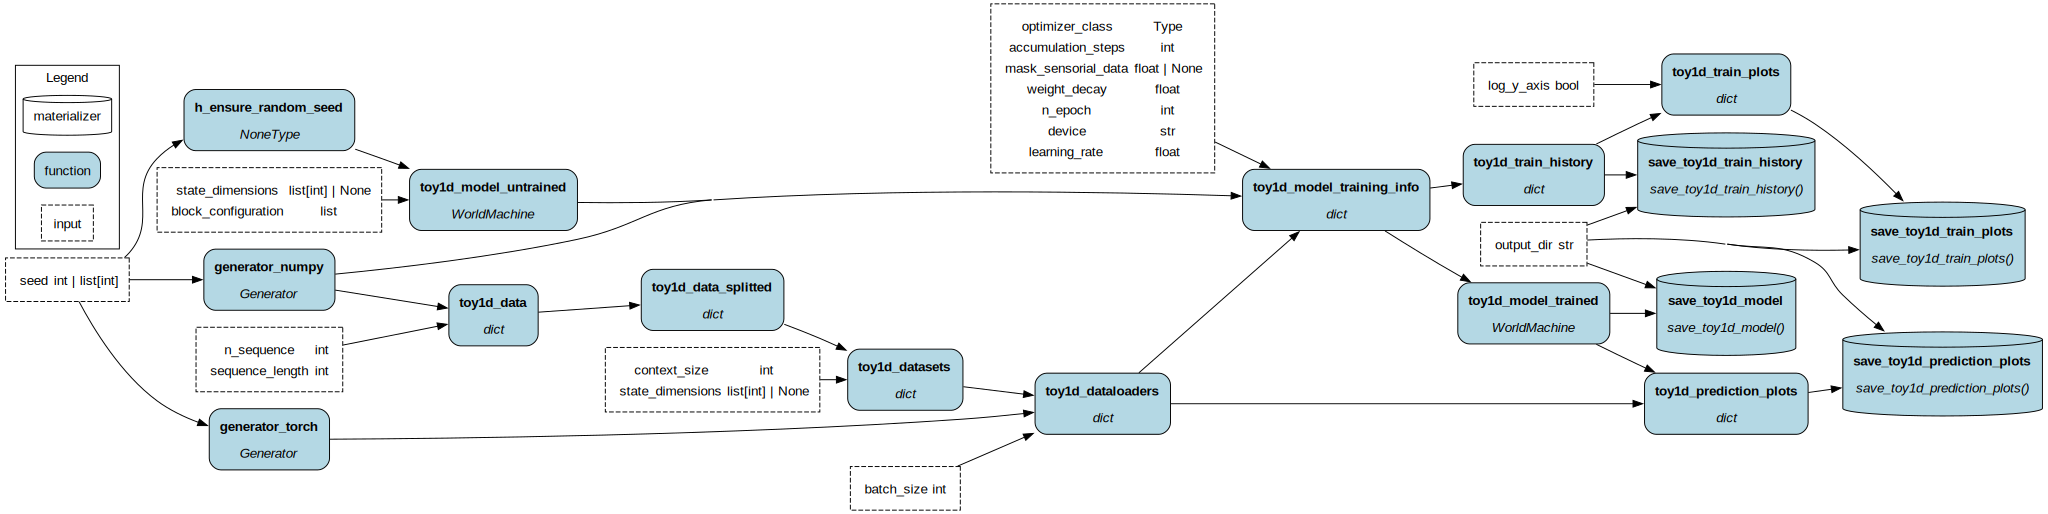

In [2]:
tracker = adapters.HamiltonTracker(
    project_id=1,
    username="EltonCN",
    dag_name="toy1d_base"
)

d = driver.Builder().with_modules(base, shared).with_adapter(tracker).build()

d.display_all_functions(deduplicate_inputs=True)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

inputs = {"sequence_lenght": 1000,
                       "n_sequence": 10000,
                       "context_size": 200,
                       "state_dimensions": None,
                       "batch_size": 32,
                       "n_epoch": 1,
                       "learning_rate": 5e-3,
                       "weight_decay": 5e-4,
                       "accumulation_steps": 1,
                       "optimizer_class": AdamW,
                       "block_configuration": [Dimensions.NEXT_MEASUREMENT],
                       "device": device,
                       "seed":42
                       }

In [7]:
outputs = d.execute(["toy1d_model_untrained"], inputs=inputs)


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/175


Captured execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/175



In [ ]:
wm : WorldMachine = outputs["toy1d_model_untrained"]

In [36]:
weights_start = {}


weights_start["sensorial_encoder"] = wm._sensorial_encoders["next_measurement"].weight.clone().detach().cpu()
weights_start["s_block_linear1"] = wm.blocks[0].block.linear1.weight.clone().detach().cpu()
weights_start["s_block_linear2"] = wm.blocks[0].block.linear2.weight.clone().detach().cpu()
weights_start["s_block_attention"] = wm.blocks[0].block.attention.attention.in_proj_weight.clone().detach().cpu()
weights_start["s_block_conditioning_linear"] = wm.blocks[0].block.conditioning_mlp[1].weight.clone().detach().cpu()

In [37]:
outputs = d.execute(["toy1d_model_training_info"], inputs=inputs,
                    overrides={"toy1d_model_untrained":wm})


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/176

100%|██████████| 250/250 [00:02<00:00, 105.10it/s]


VAL Epoch [0/1],             Loss: 0.0976


100%|██████████| 750/750 [00:09<00:00, 79.41it/s]


Epoch [1/1],             Loss: 0.0021, Elapsed Time: 9.49 sec


100%|██████████| 250/250 [00:02<00:00, 110.00it/s]


VAL Epoch [1/1],             Loss: 0.0000



Captured execution run. Results can be found at http://localhost:8241/dashboard/project/1/runs/176



In [40]:
wm = outputs["toy1d_model_training_info"]["toy1d_model_trained"]

In [41]:
weights_end = {}


weights_end["sensorial_encoder"] = wm._sensorial_encoders["next_measurement"].weight.clone().detach().cpu()
weights_end["s_block_linear1"] = wm.blocks[0].block.linear1.weight.clone().detach().cpu()
weights_end["s_block_linear2"] = wm.blocks[0].block.linear2.weight.clone().detach().cpu()
weights_end["s_block_attention"] = wm.blocks[0].block.attention.attention.in_proj_weight.clone().detach().cpu()
weights_end["s_block_conditioning_linear"] = wm.blocks[0].block.conditioning_mlp[1].weight.clone().detach().cpu()

In [47]:
for key in weights_start:
    print(key, torch.sum(torch.abs(weights_end[key] - weights_start[key])).item())

sensorial_encoder 0.32687613368034363
s_block_linear1 13.814069747924805
s_block_linear2 5.2205424308776855
s_block_attention 9.446342468261719
s_block_conditioning_linear 8.00981616973877


In [48]:
from world_machine_experiments.shared.load_train_history import load_train_history

In [49]:
import os

os.getcwd()

'c:\\Users\\eltsu\\Documentos\\Projetos\\WorldMachine\\WorldMachine\\dev'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


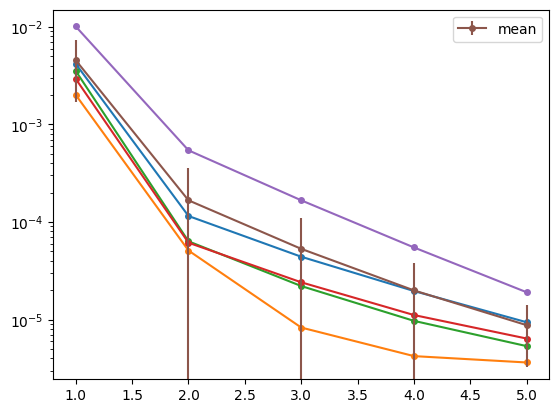

In [67]:

hists_S = load_train_history("toy1d_block_configuration/S", "toy1d_train_history")

epochs = range(1,6,1)

losses = np.empty((5, 5))

for i in range(5):
    plt.plot(epochs, hists_S[f"run_{i}"]["optimizer_loss_train"], "o-", markersize= 4)
    losses[i] = hists_S[f"run_{i}"]["optimizer_loss_train"]

plt.errorbar(epochs,losses.mean(axis=0), losses.std(axis=0),fmt="o-", markersize= 4,  label="mean")

plt.legend()

plt.yscale("log")
plt.show()

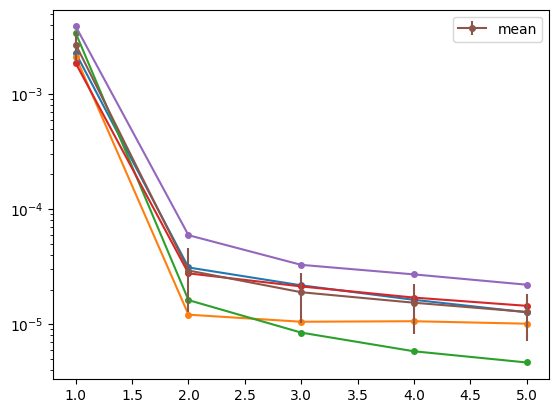

In [68]:

hists_C = load_train_history("toy1d_block_configuration/C", "toy1d_train_history")

epochs = range(1,6,1)

losses = np.empty((5, 5))

for i in range(5):
    plt.plot(epochs, hists_C[f"run_{i}"]["optimizer_loss_train"], "o-", markersize= 4)
    losses[i] = hists_C[f"run_{i}"]["optimizer_loss_train"]

plt.errorbar(epochs,losses.mean(axis=0), losses.std(axis=0),fmt="o-", markersize= 4,  label="mean")

plt.legend()

plt.yscale("log")
plt.show()

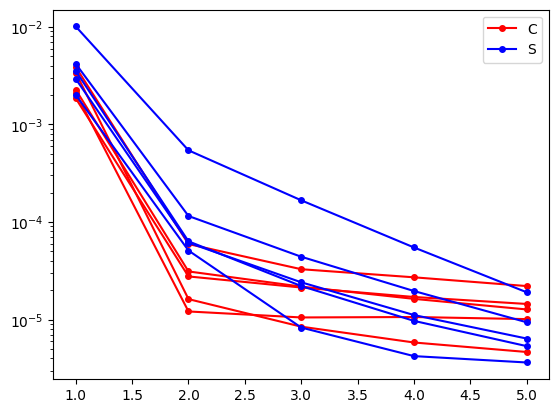

In [82]:
for i in range(5):
    handle_c, = plt.plot(epochs, hists_C[f"run_{i}"]["optimizer_loss_train"], "o-", markersize= 4, color="red", label="C")

for i in range(5):
    handle_s, = plt.plot(epochs, hists_S[f"run_{i}"]["optimizer_loss_train"], "o-", markersize= 4, color="blue", label="S")

plt.legend(handles=[handle_c, handle_s])


plt.yscale("log")

plt.show()


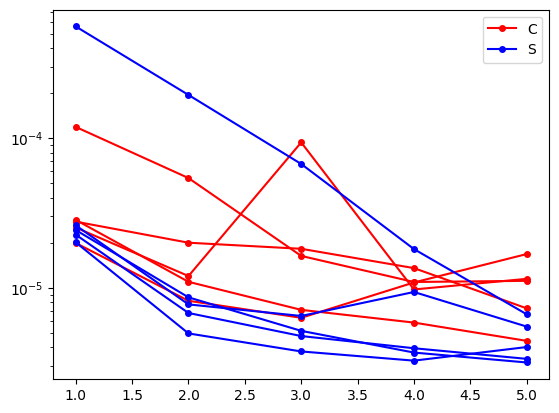

In [ ]:
for i in range(5):
    handle_c, = plt.plot(epochs, hists_C[f"run_{i}"]["optimizer_loss_val"], "o-", markersize= 4, color="red", label="C")

for i in range(5):
    handle_s, = plt.plot(epochs, hists_S[f"run_{i}"]["optimizer_loss_val"], "o-", markersize= 4, color="blue", label="S")

plt.legend(handles=[handle_c, handle_s])

plt.yscale("log")

plt.show()
